In [36]:
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import cv2
from IPython.display import Image

class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1,3, (28,28)),
            nn.Flatten(),
            nn.Linear(3, 10)
        )

    def forward(self, x):
        x = self.net(x)
        return F.log_softmax(x, dim=1)


def plot_tensor(tensor):
    mean = torch.mean(tensor)
    tensor = tensor.data.clone()
    tensor[tensor >= mean] = 255
    tensor[tensor < mean] = 0
    plt.imshow(tensor.numpy())


def train(model, data):
    NUM_EPOCHS = 1000
    model.train()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

    for epoch  in range(0, NUM_EPOCHS):
        optimizer.zero_grad()
        y_pred = model(data)
        loss = F.nll_loss(y_pred, torch.tensor([4]))
        loss.backward()
        optimizer.step()
    return model




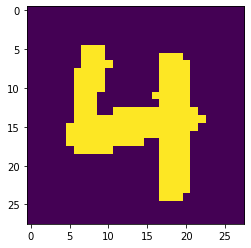

In [37]:
data = cv2.imread("4.png")
data = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)
data = torch.tensor(data, dtype=torch.float)
plot_tensor(data)

In [38]:
data = data.reshape(1,1,data.shape[0],data.shape[1])
model = SimpleNet()
filters = model.net[0].weight.data
filters = filters.clone()
filters = filters.reshape(filters.shape[0], filters.shape[2], filters.shape[3])

Filter 1


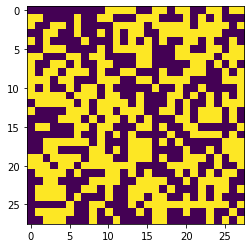

In [39]:
print("Filter 1")
plot_tensor(filters[0])

Filter 2


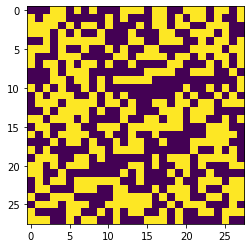

In [40]:
print("Filter 2")
plot_tensor(filters[1])

Filter 3


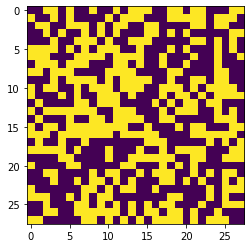

In [41]:
print("Filter 3")
plot_tensor(filters[2])

In [42]:
train(model, data)
filters = model.net[0].weight.data
filters = filters.clone()
filters = filters.reshape(filters.shape[0], filters.shape[2], filters.shape[3])

Filter 1


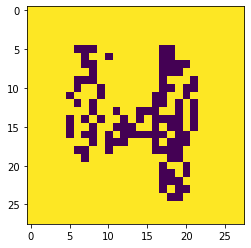

In [43]:
print("Filter 1")
plot_tensor(filters[0])

Filter 2


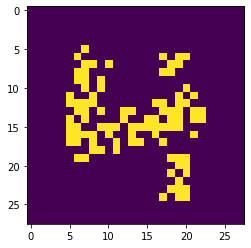

In [44]:
print("Filter 2")
plot_tensor(filters[1])

Filter 3


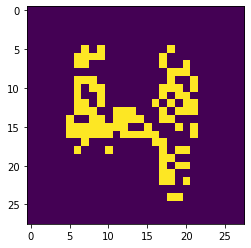

In [45]:
print("Filter 3")
plot_tensor(filters[2])

Actual 4


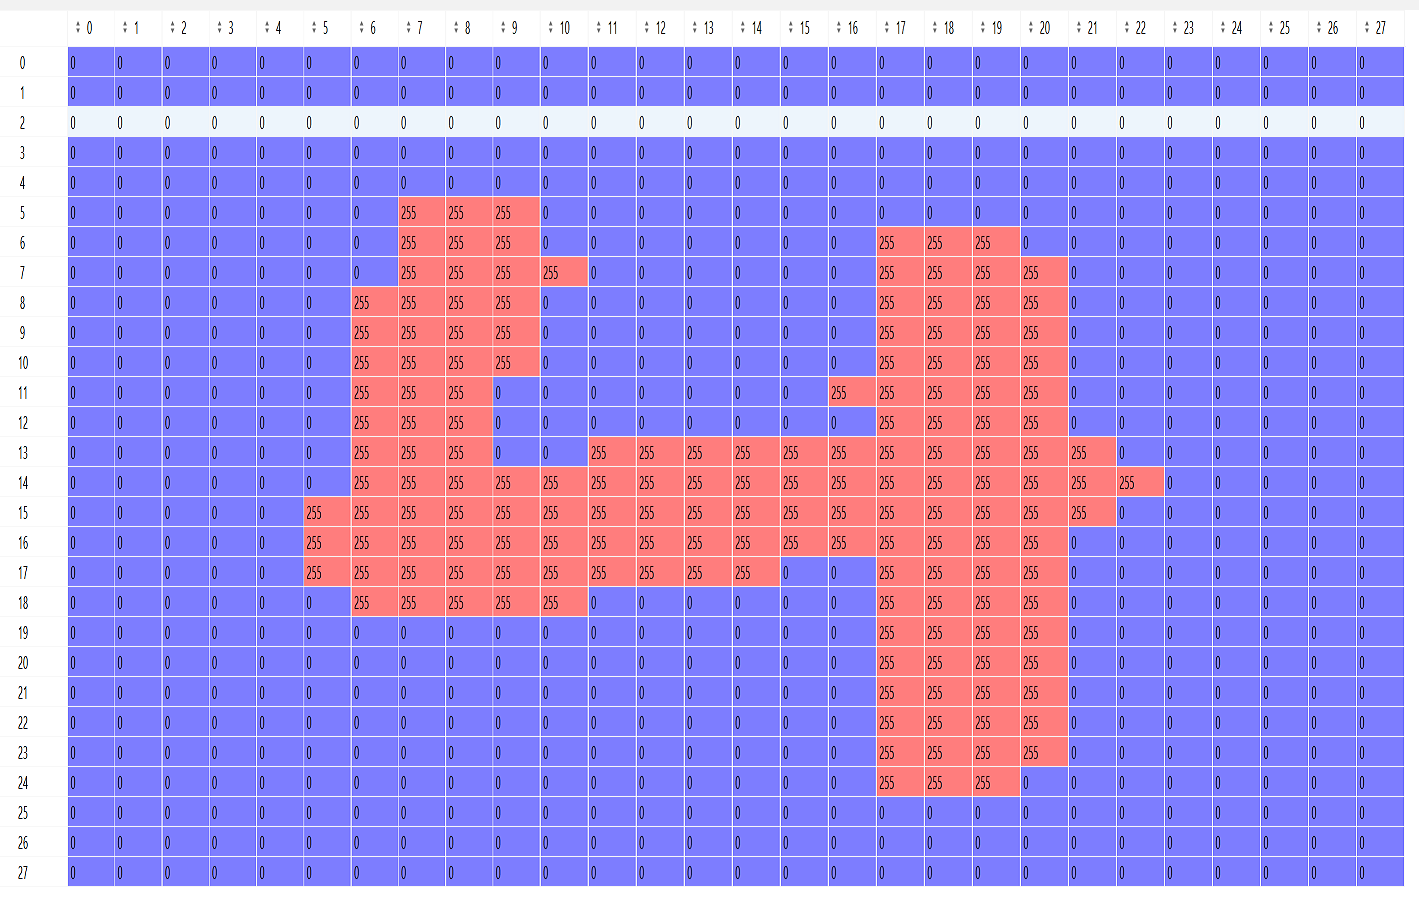

In [46]:
print("Actual 4")
Image(filename="actual.png")

A filter


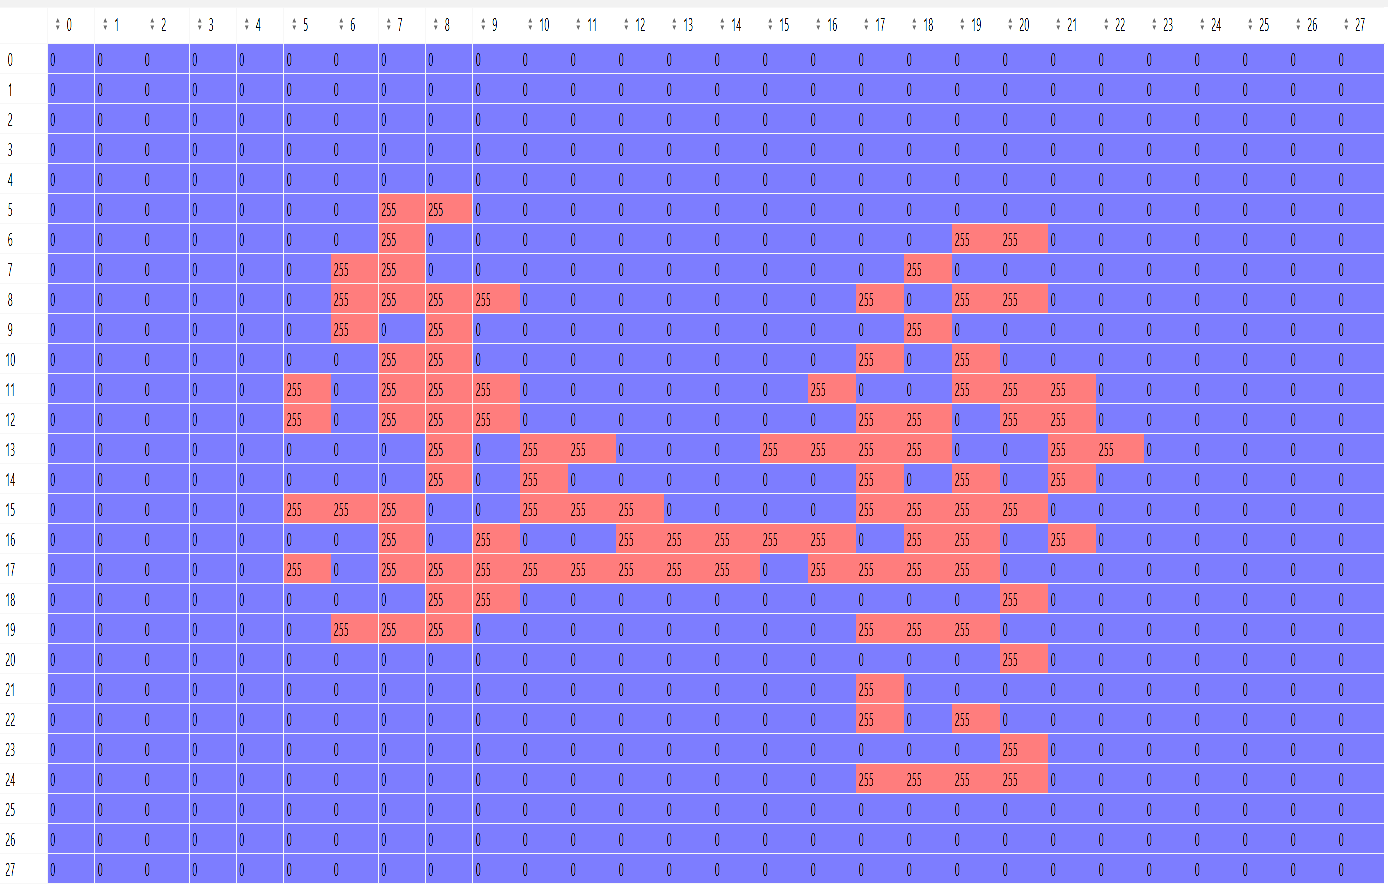

In [47]:
print("A filter")
Image(filename="afilter.png")